# Packages

In [1]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas_datareader.data as web
import requests
import json

import country_converter as coco
cc = coco.CountryConverter()

# Data

In [2]:
infos = {
    'Country' : [],
    'Type': [],
    'Usage': [],
    'Source': [],
    'Units' : [],
    'Frequency' : [],
    'Link' : []
        }

## Austria: AUS

In [3]:
def get_energy_links(start=1577833200000, end=1590443159999,  path='../raw/'):
    countries = [
        "AT", # Austria
        'DE', # Germany
    ]
    for country in countries:
        url = f"https://www.smard.de/en/downloadcenter/download_market_data/5730#!?downloadAttributes=%7B%22selectedCategory%22:1,%22selectedSubCategory%22:1,%22selectedRegion%22:%22{country}%22,%22from%22:{start},%22to%22:{end},%22selectedFileType%22:%22CSV%22%7D"
        url = url.replace('%22', '"').replace('%7B', '{').replace('%7D', '}')
        print(url)

In [4]:
df = pd.read_csv(
    '../raw/Energy/AUS.csv', 
    sep=';', 
    index_col=["Date", "Time of day"], 
    parse_dates=True, 
    thousands=',', decimal='.'
)
sources = ['Biomass[MWh]', 'Hydropower[MWh]', 
                       'Wind onshore[MWh]', 'Photovoltaics[MWh]',
                       'Other renewable[MWh]', 'Fossil hard coal[MWh]',
                       'Fossil gas[MWh]', 'Hydro pumped storage[MWh]',
                       'Other conventional[MWh]'
                      ]

#df[sources] = df[sources].apply(pd.to_numeric, errors='coerce') 
df["Total[MWh]"] = df["Total[MWh]"].str.replace(',', '')
df["Total[MWh]"] = pd.to_numeric(df["Total[MWh]"], errors='coerce')
df["Total[MWh]"] = df["Total[MWh]"]*(4) # TODO Check later: MWh -> MW
#df["Total[MWh]"] = df["Total[MWh]"].rolling(4).mean() # TODO Check later: MWhmed
df = df.groupby(by='Date', sort=False).mean()
df = df[["Total[MWh]"]]
df.index.name = ''
df.columns = ["AUS"]
df_ = df.copy()

infos['Country'].append("AUS")
infos["Type"].append('Consumption')
infos['Usage'].append(np.nan)
infos['Source'].append("All")
infos['Units'].append("Total[MWh]")
infos['Frequency'].append('Quarterhour')
infos['Link'].append(np.NaN)

df

,AUS
,
2019-01-01,6495.135417
2019-01-02,7739.125000
2019-01-03,8152.062500
2019-01-04,8231.375000
2019-01-05,7643.447917
...,...
2020-08-19,6677.500000
2020-08-20,6601.500000
2020-08-21,6316.758621


## Germany: GER

In [5]:
df = pd.read_csv(
    '../raw/Energy/GER.csv', 
    sep=';', 
    index_col=["Date", "Time of day"], 
    parse_dates=True, 
    thousands=',', decimal='.', 
)
sources = ['Biomass[MWh]', 'Hydropower[MWh]', 
                       'Wind onshore[MWh]', 'Photovoltaics[MWh]',
                       'Other renewable[MWh]', 'Fossil hard coal[MWh]',
                       'Fossil gas[MWh]', 'Hydro pumped storage[MWh]',
                       'Other conventional[MWh]'
                      ]

#df[sources] = df[sources].apply(pd.to_numeric, errors='coerce') 
df["Total[MWh]"] = df["Total[MWh]"].str.replace(',', '')
df["Total[MWh]"] = pd.to_numeric(df["Total[MWh]"], errors='coerce')
df["Total[MWh]"] = df["Total[MWh]"]*(4) # TODO Check later: MWh -> MW
#df["Total[MWh]"] = df["Total[MWh]"].rolling(4).mean() # TODO Check later: MWhmed
df = df.groupby(by='Date', sort=False).mean()
df = df[["Total[MWh]"]]
df.index.name = ''
df.columns = ["GER"]
df = df.merge(df_, left_index=True,right_index=True)
df_ = df.copy()


infos['Country'].append("GER")
infos["Type"].append('Consumption')
infos['Usage'].append(np.nan)
infos['Source'].append("All")
infos['Units'].append("Total[MWh]")
infos['Frequency'].append('Quarterhour')
infos['Link'].append(np.NaN)

df

,GER,AUS
,,
2019-01-01,45645.375000,6495.135417
2019-01-02,57582.375000,7739.125000
2019-01-03,60356.625000,8152.062500
2019-01-04,61111.125000,8231.375000
2019-01-05,54469.625000,7643.447917
...,...,...
2020-08-19,54654.083333,6677.500000
2020-08-20,55437.125000,6601.500000
2020-08-21,54965.800000,6316.758621


## Luxembourg: LUX

In [6]:
df = pd.read_csv(
    '../raw/Energy/LUX.csv', 
    sep=';', 
    index_col=["Date", "Time of day"],  
    thousands=',', decimal='.',
    parse_dates=True
)
df["Total[MWh]"] = df["Total[MWh]"].str.replace(',', '')
df["Total[MWh]"] = pd.to_numeric(df["Total[MWh]"], errors='coerce')
df["Total[MWh]"] = df["Total[MWh]"]*(4) # TODO Check later: MWh -> MW
#df["Total[MWh]"] = df["Total[MWh]"].rolling(4).mean() # TODO Check later: MWhmed
df = df.groupby(by='Date', sort=False).mean()
df.index.name = ''
df.columns = ["LUX"]
df = ((df).merge((df_), left_index=True,right_index=True))
df_ = (df).copy() # TODO: Check latter

infos['Country'].append("LUX")
infos["Type"].append('Consumption') # Production not available
infos['Usage'].append(np.nan)
infos['Source'].append(np.nan)
infos['Units'].append("MWh")
infos['Frequency'].append('Quarterhour')
infos['Link'].append(np.NaN)

df

,LUX,GER,AUS
,,,
2019-01-01,395.145833,45645.375000,6495.135417
2019-01-02,113.833333,57582.375000,7739.125000
2019-01-03,0.000000,60356.625000,8152.062500
2019-01-04,122.604167,61111.125000,8231.375000
2019-01-05,366.916667,54469.625000,7643.447917
...,...,...,...
2020-08-19,395.208333,54654.083333,6677.500000
2020-08-20,476.333333,55437.125000,6601.500000
2020-08-21,414.705882,54965.800000,6316.758621


## Brazil: BRA

In [7]:
datelist = pd.date_range(
    start = "01/31/2020",
    end = str(dt.today().strftime("%m/%d/%Y")),
    freq='M',
).to_pydatetime().tolist()
datelist = [date.strftime("%Y_%m_%d") for date in datelist] #+ [str(dt.today().strftime("%Y_%m_%d"))]

df = pd.DataFrame()

for date in datelist:
    url = f"http://sdro.ons.org.br/SDRO/DIARIO/{date}/HTML/07_DadosDiariosAcumulados_Regiao.html"
    df = df.append(pd.read_html(
        url,
        index_col = [0], skiprows=1, header=0, 
        thousands='.', #decimal=','
            )[0])
df = df[["Total"]] # TODO Check later: MWmed dia -> MW
df.columns = ["BRA"]
df.index = pd.date_range(
    start = df.index[0],
    end = df.index[-1],
    freq='D', 
)

df.to_csv('../raw/Energy/BRA.csv')
df = df.merge(df_, left_index=True,right_index=True)
df_ = df.copy()

infos['Country'].append("BRA")
infos["Type"].append('Demand') # Consumption not available
infos['Usage'].append(np.nan)
infos['Source'].append('All')
infos['Units'].append("MWmed")
infos['Frequency'].append('Dailly')
infos['Link'].append(url)

df

,BRA,LUX,GER,AUS
2020-01-01,55746,374.166667,43989.000000,6325.791667
2020-01-02,64440,460.875000,53865.750000,7256.833333
2020-01-03,63196,395.250000,55655.250000,7539.166667
2020-01-04,60802,394.791667,52640.625000,7089.750000
2020-01-05,57260,421.708333,47989.625000,6685.333333
...,...,...,...,...
2020-08-19,66250,395.208333,54654.083333,6677.500000
2020-08-20,65755,476.333333,55437.125000,6601.500000
2020-08-21,63611,414.705882,54965.800000,6316.758621
2020-08-22,57532,NaN,NaN,NaN


## France: FRA

In [8]:
url = 'https://www.data.gouv.fr/en/datasets/r/cfc27ff9-1871-4ee8-be64-b9a290c06935'
#df = pd.read_csv(
#    url,
#    sep = ';',
#    #'../raw/Energy/FRA.csv',
#    usecols=['Date - Heure', 'Date', 'Heure', 'Consommation brute totale (MW)'],
#    index_col=['Date'], 
#    parse_dates=True, dayfirst=True
#    #thousands=',' # Check
#)
#df = df.sort_values(by='Date - Heure').drop('Date - Heure', axis='columns')
#df.reset_index(inplace=True)
#df = (df.groupby(by='Date').mean())/2
#df = df[['Consommation brute totale (MW)']]
#df = df["2020":]#/1000 # Check later
#df.columns = ["FRA"]
#df.to_csv('../raw/Energy/FRA.csv')
#df = (df).merge(df_, left_index=True,right_index=True).dropna()
#df_ = df.copy()

#infos['Country'].append("FRA")
#infos["Type"].append('Consumption')
#infos['Usage'].append(np.nan)
#infos['Source'].append('All')
#infos['Units'].append("MW")
#infos['Frequency'].append('halfhour')
#infos['Link'].append(url)

#df

## Spain: SPA

In [9]:
datelist = pd.date_range(
    start = "01/01/2020",
    end = str((dt.today()- timedelta(days=2)).strftime("%d/%m/%Y")),
    freq='D', 
).to_pydatetime().tolist()

df = pd.DataFrame()
for day in datelist:
    #url = f'https://demanda.ree.es/visiona/peninsula/demanda/tablas/{day:%Y-%m-%d}/1'
    url = f"https://apidatos.ree.es/es/datos/demanda/demanda-tiempo-real?start_date={day:%Y-%m-%d}T00:00&end_date={(day + timedelta(days=1)):%Y-%m-%d}T01:00&time_trunc=hour"
    response=requests.request(url=url, method='get')
    data=response.json()
    value = pd.DataFrame(
    data['included'][0]['attributes']['values'],
        )
    value = value[['value']].rolling(6).mean()
    value = value[['value']].mean() # Unity: MW
    value = pd.DataFrame({
    'ESP': value,
    'Date': [day.strftime("%Y-%m-%d")]
    }, )
    value['Date'] = pd.to_datetime(value['Date'])
    value = value.set_index('Date')
    value.index.name=''
    df = df.append(value)
df.to_csv('../raw/Energy/ESP.csv')
df = df.merge(df_, left_index=True,right_index=True)
df_ = df.copy()

infos['Country'].append("ESP")
infos["Type"].append('Consumption')
infos['Usage'].append(np.nan)
infos['Source'].append('All')
infos['Units'].append("MW")
infos['Frequency'].append('10 minutes')
infos['Link'].append(url)

df

,ESP,BRA,LUX,GER,AUS
2020-01-01,22749.523973,55746,374.166667,43989.000000,6325.791667
2020-01-02,28531.121005,64440,460.875000,53865.750000,7256.833333
2020-01-03,29669.235160,63196,395.250000,55655.250000,7539.166667
2020-01-04,27320.920091,60802,394.791667,52640.625000,7089.750000
2020-01-05,25808.518265,57260,421.708333,47989.625000,6685.333333
...,...,...,...,...,...
2020-08-19,28603.175799,66250,395.208333,54654.083333,6677.500000
2020-08-20,28704.667808,65755,476.333333,55437.125000,6601.500000
2020-08-21,29097.656393,63611,414.705882,54965.800000,6316.758621
2020-08-22,26485.970320,57532,NaN,NaN,NaN


In [10]:
df.to_csv('../raw/Energy/Energy_Dataset.csv')

## Visualization

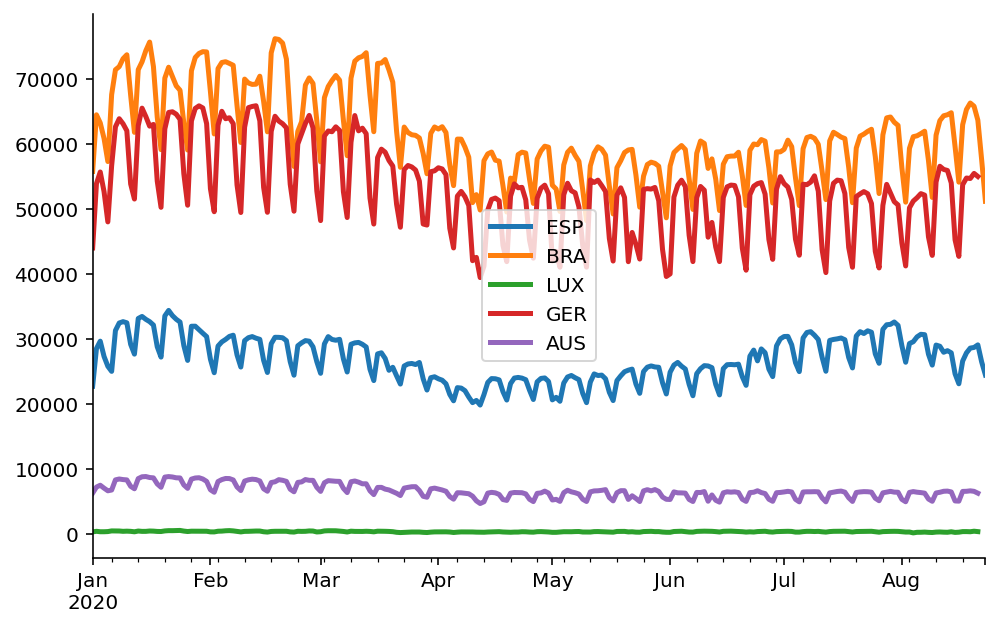

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
df.plot(ax=ax, lw=2.5)

sns.despine()
plt.show()

In [12]:
infos = pd.DataFrame(infos)
infos = infos.set_index('Country')
infos

,Type,Usage,Source,Units,Frequency,Link
Country,,,,,,
AUS,Consumption,NaN,All,Total[MWh],Quarterhour,NaN
GER,Consumption,NaN,All,Total[MWh],Quarterhour,NaN
LUX,Consumption,NaN,NaN,MWh,Quarterhour,NaN
BRA,Demand,NaN,All,MWmed,Dailly,http://sdro.ons.org.br/SDRO/DIARIO/2020_11_30/...
ESP,Consumption,NaN,All,MW,10 minutes,https://apidatos.ree.es/es/datos/demanda/deman...


# Aux

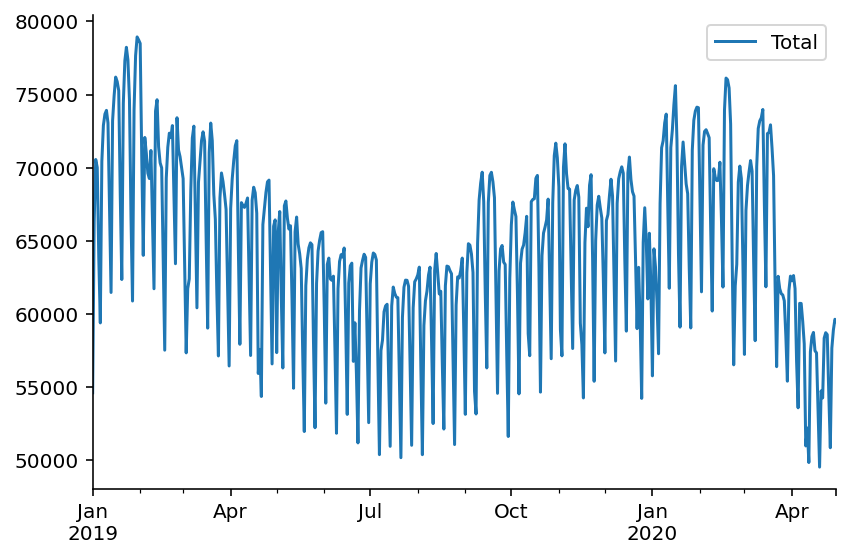

In [13]:
datelist = pd.date_range(
    start = "31/01/2019",
    end = "26/05/2020",
    freq='M',
).to_pydatetime().tolist()
datelist = [date.strftime("%Y_%m_%d") for date in datelist] #+ [str(dt.today().strftime("%Y_%m_%d"))]

aux = pd.DataFrame()

for date in datelist:
    url = f"http://sdro.ons.org.br/SDRO/DIARIO/{date}/HTML/07_DadosDiariosAcumulados_Regiao.html"
    aux = aux.append(pd.read_html(
        url,
        index_col = [0], skiprows=1, header=0, 
        thousands='.', #decimal=','
            )[0])
#aux = aux[["Total"]] # TODO Check later: MWmed dia -> MW

aux.index = pd.date_range(
    start = aux.index[0],
    end = aux.index[-1],
    freq='D', 
)

aux.to_csv('../raw/Energy/BRA_aux.csv')


aux[["Total"]].plot()
plt.tight_layout()
sns.despine()
plt.show()